<a href="https://colab.research.google.com/github/Voltaire01-W/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-18 01:57:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-03-18 01:57:00 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [3]:
# TODO - your code!
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
import numpy as np

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
dem = df[df['party']=='democrat']
rep = df[df['party']=='republican']

In [0]:
from scipy import stats

In [11]:
for col in dem.columns.to_list()[1:]:
  print(stats.ttest_ind(dem[col], rep[col], nan_policy='omit'))

Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327937243e-18)
Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)
Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)
Ttest_indResult(statistic=-49.36708157301406, pvalue=1.994262314074344e-177)
Ttest_indResult(statistic=-21.13669261173219, pvalue=5.600520111729011e-68)
Ttest_indResult(statistic=-9.737575825219457, pvalue=2.3936722520597287e-20)
Ttest_indResult(statistic=12.526187929077842, pvalue=8.521033017443867e-31)
Ttest_indResult(statistic=18.052093200819733, pvalue=2.82471841372357e-54)
Ttest_indResult(statistic=16.437503268542994, pvalue=5.03079265310811e-47)
Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)
Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)
Ttest_indResult(statistic=-20.500685724563073, pvalue=1.8834203990450192e-64)
Ttest_indResult(statistic=-13.51064251060933, pvalue=1.2278581709672758e-34)
Ttest_indRes

In [0]:
def ttest_2samp(sample1, sample2):
  
  data1 = sample1.copy()
  data2 = sample2.copy()

  sample1 = data1.dropna()
  sample2 = data2.dropna()

  xbar1 = np.mean(sample1)
  xbar2 = np.mean(sample2)

  n1 = len(sample1)
  n2 = len(sample2)

  s1 = np.std(sample1, ddof=1)
  s2 = np.std(sample2, ddof=1)

  t = (xbar1 - xbar2) / np.sqrt(((s1**2/n1)+(s2**2/n2)))

  p_value = stats.t.sf(np.abs(t), np.minimum(n1,n2)-1)*2

  return (t, p_value)

In [13]:
for col in dem.columns.to_list()[1:]:
  print('\n', col)
  print(ttest_2samp(dem[col], rep[col]))


 handicapped-infants
(9.662336936353906, 9.16829619120612e-18)

 water-project
(-0.08893998898558053, 0.9292506597176856)

 budget
(22.79324627068853, 1.4651208330952065e-52)

 physician-fee-freeze
(-56.70480591963001, 1.1389491443336355e-109)

 el-salvador-aid
(-23.90728761927345, 2.52624383353158e-55)

 religious-groups
(-10.767024944451324, 8.21005678885208e-21)

 anti-satellite-ban
(12.467492597567187, 2.116935368304177e-25)

 aid-to-contras
(18.254856278479288, 1.4716621649246988e-40)

 mx-missile
(17.40904790912838, 4.1102312239186155e-39)

 immigration
(-1.737470365966673, 0.08418147778715215)

 synfuels
(9.040573783842056, 5.321704411980494e-16)

 education
(-20.724815686746823, 2.118054278955082e-46)

 right-to-sue
(-14.35256657861077, 2.239107886001796e-30)

 crime
(-19.927655969596014, 3.356396002973276e-45)

 duty-free
(14.376244598606103, 2.549354345330753e-30)

 south-africa
(6.397886659733334, 2.0421394637678307e-09)


In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = data[~np.isnan(data)]
  
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)

  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)

  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [15]:
~np.isnan(rep['handicapped-infants'])

0      True
1      True
7      True
8      True
10     True
       ... 
427    True
430    True
432    True
433    True
434    True
Name: handicapped-infants, Length: 168, dtype: bool

In [16]:
confidence_intervals = []

for col in rep.columns.to_list()[1:]:
  confidence_intervals.append(confidence_interval(rep[col]))

confidence_intervals

[(0.18787878787878787, 0.12765166444807918, 0.24810591130949655),
 (0.5067567567567568, 0.42526571045979167, 0.5882478030537219),
 (0.13414634146341464, 0.08143520131697565, 0.18685748160985363),
 (0.9878787878787879, 0.9710067448304756, 1.0047508309271003),
 (0.9515151515151515, 0.9183979451371699, 0.9846323578931332),
 (0.8975903614457831, 0.850987486003394, 0.9441932368881721),
 (0.24074074074074073, 0.17420089269707362, 0.30728058878440784),
 (0.15286624203821655, 0.09595477158126557, 0.20977771249516752),
 (0.11515151515151516, 0.06593485907282265, 0.16436817123020767),
 (0.5575757575757576, 0.4809959592103161, 0.6341555559411991),
 (0.1320754716981132, 0.0788755652396695, 0.18527537815655692),
 (0.8709677419354839, 0.8176017935029393, 0.9243336903680285),
 (0.8607594936708861, 0.8061858971620528, 0.9153330901797194),
 (0.9813664596273292, 0.960253517544598, 1.0024794017100602),
 (0.08974358974358974, 0.044394355010013827, 0.13509282447716567),
 (0.6575342465753424, 0.579646041604

In [17]:
df = pd.DataFrame(confidence_intervals)
df.columns = ['mean', 'lower', 'upper']
df['moe'] = df['upper'] - df['mean']

print(df.shape)
df.head()

(16, 4)


,mean,lower,upper,moe
0,0.187879,0.127652,0.248106,0.060227
1,0.506757,0.425266,0.588248,0.081491
2,0.134146,0.081435,0.186857,0.052711
3,0.987879,0.971007,1.004751,0.016872
4,0.951515,0.918398,0.984632,0.033117


In [0]:
import matplotlib.pyplot as plt
issues = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

issues = np.array(issues)

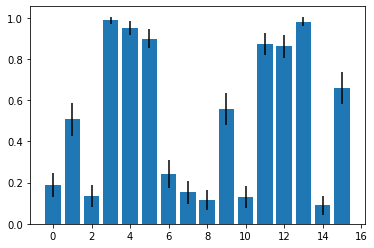

In [25]:
plt.bar(x=range(0,16), height=df['mean'], yerr=df['moe'])
plt.show()

In [26]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2020-03-18 02:16:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-03-18 02:16:35 (143 MB/s) - ‘iris.data’ saved [4551/4551]



In [29]:
iris = pd.read_csv('iris.data', names=['length', 'width', 'petal_length', 'petal_width', 'class'])
iris

,length,width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
np.array(iris)

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [48]:
from scipy.stats import chisquare

ind_obs = np.array(iris['length']).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array(iris['petal_width']).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
Power_divergenceResult(statistic=17.48459783228751, pvalue=1.0)
[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.

In [57]:
iris['width'].value_counts().sort_index()

2.0     1
2.2     3
2.3     4
2.4     3
2.5     8
2.6     5
2.7     9
2.8    14
2.9    10
3.0    26
3.1    12
3.2    13
3.3     6
3.4    12
3.5     6
3.6     3
3.7     3
3.8     6
3.9     2
4.0     1
4.1     1
4.2     1
4.4     1
Name: width, dtype: int64

In [65]:
iris['width'].shape

(150,)

In [55]:
iris['length'].value_counts().sort_index()

4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
Name: length, dtype: int64

In [58]:
observe = pd.crosstab(iris['length'], iris['width'], margins=True)

observe

width,2.0,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4,All
length,,,,,,,,,,,,,,,,,,,,,,,,
4.3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4.4,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3
4.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4.6,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,4
4.7,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2
4.8,0,0,0,0,0,0,0,0,0,2,1,0,0,2,0,0,0,0,0,0,0,0,0,5
4.9,0,0,0,1,1,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,6
5.0,1,0,1,0,0,0,0,0,0,1,0,1,1,2,2,1,0,0,0,0,0,0,0,10
5.1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2,0,1,3,0,0,0,0,0,9


In [59]:
observate = pd.crosstab(iris['length'], iris['width'], margins=True)

observate = observate.values

observate

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,
          1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   1,   0,   0,
          2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5],
       [  0,   0,   0,   1,   1,   0,   0,   0,   0,   1,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6],
       [  1,   0,   1,   0,   0,   0,   0

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)